XOR Truth Table:
Input		Output
[0. 0.]	0.0
[0. 1.]	1.0
[1. 0.]	1.0
[1. 1.]	0.0

Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)


Training the network...
Final Loss: 0.0004
Final Accuracy: 1.0000

Results after training:
Input		Expected	Predicted	Rounded
[0. 0.]	0.0		0.0015		0
[0. 1.]	1.0		0.9999		1
[1. 0.]	1.0		0.9999		1
[1. 1.]	0.0		0.0000		0

Decision boundary plot saved as 'xor_decision_boundary.png'
Training history plot saved as 'xor_training_history.png'

Visualization complete!

Learned Weights:

hidden_layer:
  Weights shape: (2, 4)
  Biases shape: (4,)

output_layer:
  Weights shape: (4, 1)
  Biases shape: (1,)


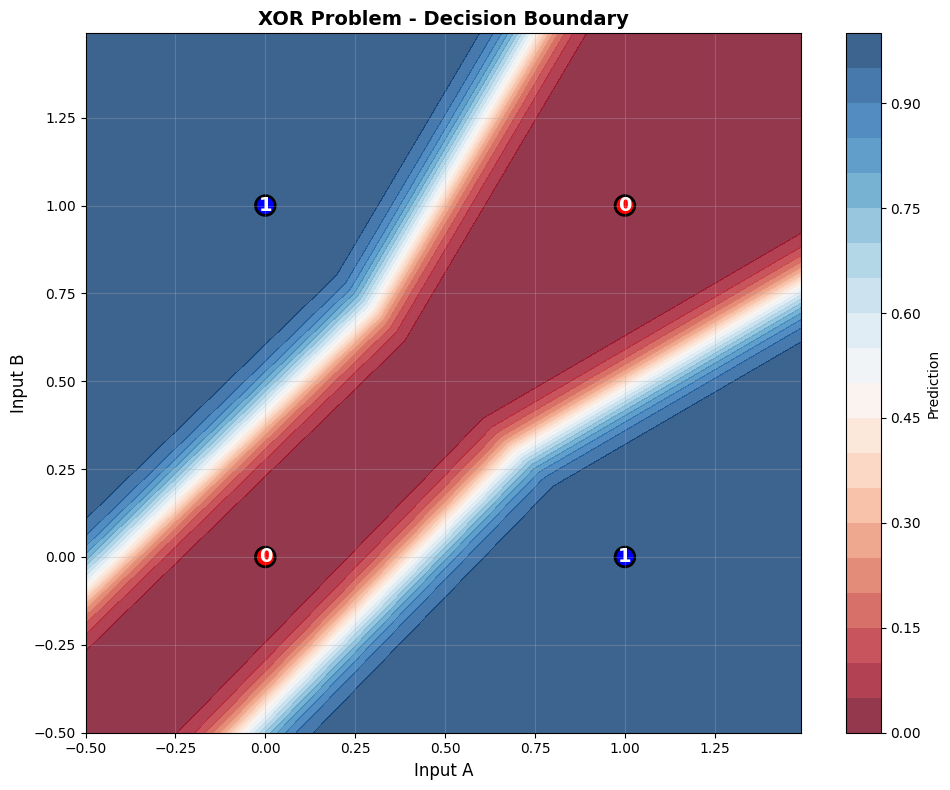

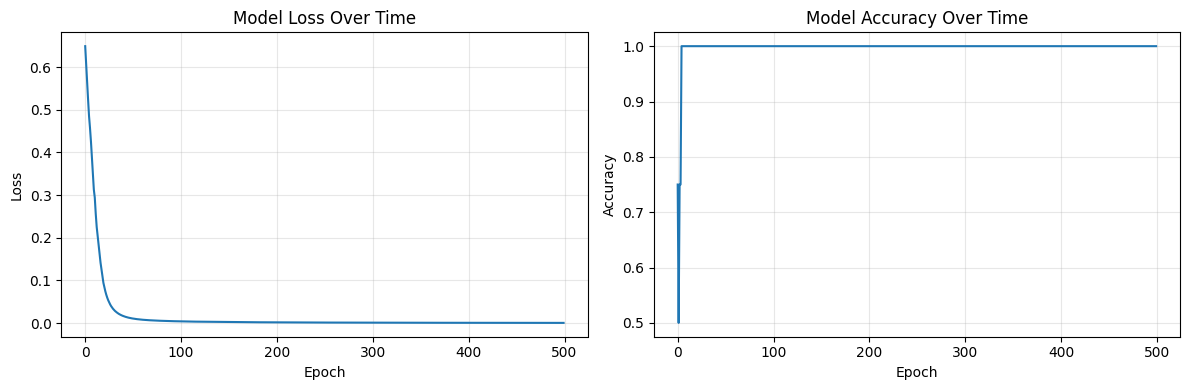

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

print("XOR Truth Table:")
print("Input\t\tOutput")
for i in range(len(X)):
    print(f"{X[i]}\t{y[i][0]}")
print()

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(2,), name='hidden_layer'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("Model Architecture:")
model.summary()
print()

# Train the model
print("Training the network...")
history = model.fit(
    X, y,
    epochs=500,
    verbose=0,
    batch_size=4
)

# Print training progress
print(f"Final Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Accuracy: {history.history['accuracy'][-1]:.4f}")
print()

# Make predictions
predictions = model.predict(X, verbose=0)

print("Results after training:")
print("Input\t\tExpected\tPredicted\tRounded")
for i in range(len(X)):
    print(f"{X[i]}\t{y[i][0]}\t\t{predictions[i][0]:.4f}\t\t{round(predictions[i][0])}")
print()

# Visualize decision boundary
def plot_decision_boundary(model, X, y):
    # Create a mesh grid
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict for each point in the mesh
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points, verbose=0)
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, levels=20, cmap='RdBu', alpha=0.8)
    plt.colorbar(label='Prediction')
    
    # Plot the XOR points
    colors = ['red' if label == 0 else 'blue' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=200, edgecolors='black', linewidths=2)
    
    # Add labels to points
    for i in range(len(X)):
        plt.annotate(f'{int(y[i][0])}', 
                    (X[i, 0], X[i, 1]), 
                    fontsize=14, 
                    ha='center', 
                    va='center',
                    color='white',
                    weight='bold')
    
    plt.xlabel('Input A', fontsize=12)
    plt.ylabel('Input B', fontsize=12)
    plt.title('XOR Problem - Decision Boundary', fontsize=14, weight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('xor_decision_boundary.png', dpi=150)
    print("Decision boundary plot saved as 'xor_decision_boundary.png'")

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.title('Model Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.title('Model Accuracy Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('xor_training_history.png', dpi=150)
    print("Training history plot saved as 'xor_training_history.png'")

# Generate visualizations
plot_decision_boundary(model, X, y)
plot_training_history(history)

print("\nVisualization complete!")

# Optional: Show weights learned by the network
print("\nLearned Weights:")
for layer in model.layers:
    weights = layer.get_weights()
    print(f"\n{layer.name}:")
    print(f"  Weights shape: {weights[0].shape}")
    print(f"  Biases shape: {weights[1].shape}")